# Bike Rental Data Exploration 
## by Sahn

## Preliminary Wrangling

The project uses 6 FordGoBike trip datasets. Data contain trip data between January 2019 and June 2019.Each month has about 200,000 trip data 

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load in the dataset into a pandas dataframe, print statistics
rawdata_jan2019 = pd.read_csv('Data/201901-fordgobike-tripdata.csv')
rawdata_feb2019 = pd.read_csv('Data/201902-fordgobike-tripdata.csv')
rawdata_mar2019 = pd.read_csv('Data/201903-fordgobike-tripdata.csv')
rawdata_apr2019 = pd.read_csv('Data/201904-fordgobike-tripdata.csv')
rawdata_may2019 = pd.read_csv('Data/201905-fordgobike-tripdata.csv')
rawdata_jun2019 = pd.read_csv('Data/201906-fordgobike-tripdata.csv')

C:\Users\psahn\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rawdata_jan2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No


In [4]:
rawdata_jan2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192082 entries, 0 to 192081
Data columns (total 16 columns):
duration_sec               192082 non-null int64
start_time                 192082 non-null object
end_time                   192082 non-null object
start_station_id           191834 non-null float64
start_station_name         191834 non-null object
start_station_latitude     192082 non-null float64
start_station_longitude    192082 non-null float64
end_station_id             191834 non-null float64
end_station_name           191834 non-null object
end_station_latitude       192082 non-null float64
end_station_longitude      192082 non-null float64
bike_id                    192082 non-null int64
user_type                  192082 non-null object
member_birth_year          182362 non-null float64
member_gender              182365 non-null object
bike_share_for_all_trip    192082 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 23.4+ MB


In [5]:
# Drop a column that doesn't exists in other months 
rawdata_jun2019.drop(columns='rental_access_method', inplace=True)

In [6]:
# Combine dataframse of each months to make one dataframe of H1 of 2019 
frames = ([rawdata_jan2019, rawdata_feb2019, rawdata_mar2019, 
           rawdata_apr2019, rawdata_may2019, rawdata_jun2019])
df = pd.concat(frames, sort=False)

In [7]:
# copy the dataframe 
df_clean = df.copy()

In [8]:
df_clean.dtypes #Get the data type of each column

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244839 entries, 0 to 191771
Data columns (total 16 columns):
duration_sec               1244839 non-null int64
start_time                 1244839 non-null object
end_time                   1244839 non-null object
start_station_id           1241934 non-null float64
start_station_name         1241934 non-null object
start_station_latitude     1244839 non-null float64
start_station_longitude    1244839 non-null float64
end_station_id             1241832 non-null float64
end_station_name           1241832 non-null object
end_station_latitude       1244839 non-null float64
end_station_longitude      1244839 non-null float64
bike_id                    1244839 non-null int64
user_type                  1244839 non-null object
member_birth_year          1176326 non-null float64
member_gender              1176550 non-null object
bike_share_for_all_trip    1240946 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 161.5+ MB


In [10]:
# Fill in 0 for missing station ID's. 
# Fill in "No Name" for missing station names 
df_clean['start_station_id'] = df_clean['start_station_id'].fillna(0)
df_clean['end_station_id'] = df_clean['end_station_id'].fillna(0)
df_clean['start_station_name'] = df_clean['start_station_name'].fillna("No Name")
df_clean['end_station_name'] = df_clean['end_station_name'].fillna("No Name")

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244839 entries, 0 to 191771
Data columns (total 16 columns):
duration_sec               1244839 non-null int64
start_time                 1244839 non-null object
end_time                   1244839 non-null object
start_station_id           1244839 non-null float64
start_station_name         1244839 non-null object
start_station_latitude     1244839 non-null float64
start_station_longitude    1244839 non-null float64
end_station_id             1244839 non-null float64
end_station_name           1244839 non-null object
end_station_latitude       1244839 non-null float64
end_station_longitude      1244839 non-null float64
bike_id                    1244839 non-null int64
user_type                  1244839 non-null object
member_birth_year          1176326 non-null float64
member_gender              1176550 non-null object
bike_share_for_all_trip    1240946 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 161.5+ MB


In [12]:
# Change data type of all ID's to int

df_clean[['start_station_id', 'end_station_id', 'bike_id']] = (
    df_clean[['start_station_id', 'end_station_id', 'bike_id']].astype('int64'))

In [13]:
# Make sure all station names are correct 
print(df_clean.start_station_name.nunique())
print(df_clean.end_station_name.nunique())
print(df_clean.start_station_id.nunique())
print(df_clean.end_station_id.nunique())
print(df_clean.start_station_latitude.nunique())
print(df_clean.start_station_longitude.nunique())
print(df_clean.end_station_latitude.nunique())
print(df_clean.end_station_longitude.nunique())

377
377
376
376
2560
2574
2662
2670


In [14]:
# One value is not unique in ID  
u_val, inds = np.unique(df_clean.start_station_name, return_index=True) 

In [15]:
# Create dataframe with station IDs and names 
df_stations = df_clean.iloc[inds][['start_station_id','start_station_name']]

In [16]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 1877 to 500
Data columns (total 2 columns):
start_station_id      377 non-null int64
start_station_name    377 non-null object
dtypes: int64(1), object(1)
memory usage: 8.8+ KB


In [17]:
df_stations[df_stations.duplicated(['start_station_id'], keep=False)]
# South 1st Street & East San Carlos Street, San Jose, CA and 
# S 1st St & E San Salvador St, San Jose, CA are a block away from each other
# Verified that the FordGoBike station is at S 1st St & E San Salvador St with Google Maps 

,start_station_id,start_station_name
277,316,1st St at San Carlos Ave
4604,316,San Salvador St at 1st St


In [18]:
# Update "1st St at San Carlos Ave" to "San Salvador St at 1st St"
df_clean.loc[df_clean['start_station_name'] == '1st St at San Carlos Ave', 
             'start_station_name'] = 'San Salvador St at 1st St'
df_clean.loc[df_clean['end_station_name'] == '1st St at San Carlos Ave', 
             'end_station_name'] = 'San Salvador St at 1st St'

In [19]:
# Change column name of df_stations
df_stations.rename(columns={'start_station_id':'station_id',
                          'start_station_name':'station_name'}, inplace=True)

In [20]:
# Sort df_stations to make it read more easily
df_stations.sort_values('station_id', inplace=True)
df_stations = df_stations.reset_index(drop=True)

In [21]:
# Drop station name columns to make dataframe more handy 
df_clean.drop(columns=['start_station_name', 'end_station_name'], inplace=True)

In [22]:
# There is no missing data in latitude and longtitude of stations. 
# If station ID and names are missing it may be possible to guess from latitude and longtitude value

print(df_clean.loc[df_clean['start_station_id'] != 0, 'start_station_latitude'].nunique())
print(df_clean.loc[df_clean['start_station_id'] == 0, 'start_station_latitude'].nunique())

# However, number of unique longtitude and latitude value for missing station ID and name are too many, 
# which supports the observation may not have valid data. 

# Better cleaning methond may be taken the place upon further investigation, but to keep the data wrangling simple,
# all obervations without station ID were dropped in this project. 

df_clean = df_clean.loc[df_clean['start_station_id'] != 0]
df_clean = df_clean.loc[df_clean['end_station_id'] != 0]  


414
2147


In [23]:
# Validate 
print(df_clean.loc[df_clean['start_station_id'] == 0, 'start_station_latitude'].nunique())
print(df_clean.loc[df_clean['end_station_id'] == 0, 'start_station_latitude'].nunique())

0
0


In [24]:
# Reset index number 
df_clean = df_clean.reset_index(drop=True)

In [25]:
# Convert str to datetime 
df_clean['start_date_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_date_time'] = pd.to_datetime(df_clean['end_time'])

# Drop 'start_time' and 'end_time'
df_clean.drop(columns=['start_time', 'end_time'], inplace=True)

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241391 entries, 0 to 1241390
Data columns (total 14 columns):
duration_sec               1241391 non-null int64
start_station_id           1241391 non-null int64
start_station_latitude     1241391 non-null float64
start_station_longitude    1241391 non-null float64
end_station_id             1241391 non-null int64
end_station_latitude       1241391 non-null float64
end_station_longitude      1241391 non-null float64
bike_id                    1241391 non-null int64
user_type                  1241391 non-null object
member_birth_year          1173832 non-null float64
member_gender              1173907 non-null object
bike_share_for_all_trip    1240201 non-null object
start_date_time            1241391 non-null datetime64[ns]
end_date_time              1241391 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(4), object(3)
memory usage: 132.6+ MB


In [28]:
# To make data tidy, separate df_clean into two different dataframes: df_tripinfo and df_userinfo
# But current data frame does not contain any unique identification for each observations 
# Therefore, arbitrary Trip ID will be created 

# Create arbitrary_trip_id 
df_clean['arbitrary_trip_id'] = pd.DataFrame.from_records(np.arange(1000001,df_clean.shape[0]+1000001).reshape(-1,1))
df_clean[['arbitrary_trip_id']] = df_clean[['arbitrary_trip_id']].astype('int64')

In [29]:
df_tripinfo = df_clean[['arbitrary_trip_id','bike_id', 'duration_sec','start_station_id',
                        'start_station_latitude', 'start_station_longitude',
                        'end_station_id', 'end_station_latitude', 'end_station_longitude',
                        'start_date_time', 'end_date_time', 'bike_share_for_all_trip']]
df_userinfo = df_clean[['arbitrary_trip_id','user_type','member_birth_year','member_gender']]

In [30]:
# fill missing data for gender and birth year
df_userinfo['member_gender'] = df_userinfo['member_gender'].fillna("No Info")
df_userinfo['member_birth_year'] = df_userinfo['member_birth_year'].fillna("0")
df_userinfo[['member_birth_year']] = df_userinfo[['member_birth_year']].astype('int64')

# Change the column name
df_userinfo.rename(columns={'member_birth_year':'user_birth_year',
                          'member_gender':'user_gender'}, inplace=True)

C:\Users\psahn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\psahn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\psahn\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [31]:
# Drop No Name station from stations table
df_stations = df_stations.loc[df_stations['station_name'] != 'No Name']  
df_stations = df_stations.reset_index(drop=True)

In [32]:
# Check df_userinfo 

print(np.unique(df_userinfo.user_gender))
print(np.unique(df_userinfo.user_type))

['?' 'F' 'Female' 'M' 'Male' 'No Info' 'Other']
['Customer' 'Subscriber']


In [33]:
# clean user_gender
df_userinfo.loc[df_userinfo['user_gender'] == 'M', 'user_gender'] = 'Male'
df_userinfo.loc[df_userinfo['user_gender'] == 'F', 'user_gender'] = 'Female'
df_userinfo.loc[df_userinfo['user_gender'] == '?', 'user_gender'] = 'No Info'

C:\Users\psahn\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
df_userinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241391 entries, 0 to 1241390
Data columns (total 4 columns):
arbitrary_trip_id    1241391 non-null int64
user_type            1241391 non-null object
user_birth_year      1241391 non-null int64
user_gender          1241391 non-null object
dtypes: int64(2), object(2)
memory usage: 37.9+ MB


In [35]:
# Check bike_share_for_all_trip
df_tripinfo['bike_share_for_all_trip'] = df_tripinfo['bike_share_for_all_trip'].fillna("No Info")
print(np.unique(df_tripinfo.bike_share_for_all_trip))

C:\Users\psahn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['No' 'No Info' 'Yes']


In [36]:
df_tripinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241391 entries, 0 to 1241390
Data columns (total 12 columns):
arbitrary_trip_id          1241391 non-null int64
bike_id                    1241391 non-null int64
duration_sec               1241391 non-null int64
start_station_id           1241391 non-null int64
start_station_latitude     1241391 non-null float64
start_station_longitude    1241391 non-null float64
end_station_id             1241391 non-null int64
end_station_latitude       1241391 non-null float64
end_station_longitude      1241391 non-null float64
start_date_time            1241391 non-null datetime64[ns]
end_date_time              1241391 non-null datetime64[ns]
bike_share_for_all_trip    1241391 non-null object
dtypes: datetime64[ns](2), float64(4), int64(5), object(1)
memory usage: 113.7+ MB


In [37]:
df_tripinfo['duration_sec'].describe()

count    1.241391e+06
mean     7.886636e+02
std      1.899367e+03
min      6.100000e+01
25%      3.450000e+02
50%      5.500000e+02
75%      8.590000e+02
max      8.611400e+04
Name: duration_sec, dtype: float64

In [38]:
# Save the cleaned dataset as csv
df_stations.to_csv('fordgobike_2019_1-6_stations.csv',index=False)
df_tripinfo.to_csv('fordgobike_2019_1-6_tripinfo.csv',index=False)
df_userinfo.to_csv('fordgobike_2019_1-6_userinfo.csv',index=False)

### What is the structure of your dataset?
Note: Answer is based on the cleaned datasets 
- There are 1,241,391 observations. 
- df_tripinfo contains 14 variables, including the arbitrary Trip ID.
- df_userinfo contatins 4 variables. including the arbitrary Trip ID. 
- df_stations is a table to match station IDs to station name. There are 376 stations. 

### What is/are the main feature(s) of interest in your dataset?
- I am interested in investigating popularity of use FordGoBike. (i.e. What is the popular location? When is the popular time to ride a rental bike?)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- Time: I expect more people will use Fordgobikes in the morning to go to school or work and in the late afternoon to return home 
- Date: I expect more people will use Fordgobikes in spring and summer season (March - June) compare to winter season (January - Feburary) because winter is raining season of San Francisco Bay Area

## Univariate Exploration

**Variable of interest: Date**

In [39]:
import matplotlib.dates as mdates

In [40]:
# Get sample data to explore efficiently 
# samples = np.random.choice(df_tripinfo.shape[0], 5000, replace = False)
# trip_samp = df_tripinfo.iloc[samples,:]
# trip_samp.head()

In [41]:
# df_tripinfo["start_date"] = df_tripinfo["start_date"].astype("datetime64")
# df_tripinfo["end_date"] = df_tripinfo["end_date"].astype("datetime64")

C:\Users\psahn\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


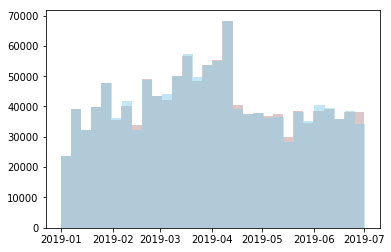

In [42]:
# Compare with histogram. 

plt.hist(df_tripinfo["start_date_time"].values, bins = 30, color = 'RosyBrown', alpha = 0.5);
plt.hist(df_tripinfo["end_date_time"].values, bins = 30, color = 'SkyBlue', alpha = 0.5);

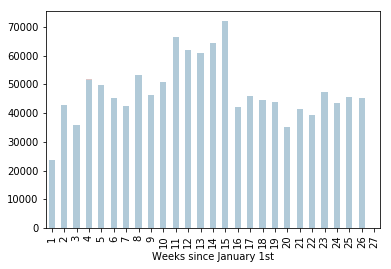

In [43]:
# Compare by week. Similar result as above, but this is easier to understand date format 
df_tripinfo['start_date_time'].groupby(df_tripinfo["start_date_time"].dt.week).count().plot(kind="bar", color = 'RosyBrown', alpha = 0.5)
df_tripinfo['end_date_time'].groupby(df_tripinfo["end_date_time"].dt.week).count().plot(kind="bar", color = 'skyblue', alpha = 0.5)
plt.xlabel('Weeks since January 1st');

# Two histograms overlap almost perfectly. This means start date and end date do not have big difference 

Number of Fordgobike use shows increase between January and April as expected. However, interestingly, the pick is around mid-April then the number of use drops steeply. 

**Variable of interest: Time**

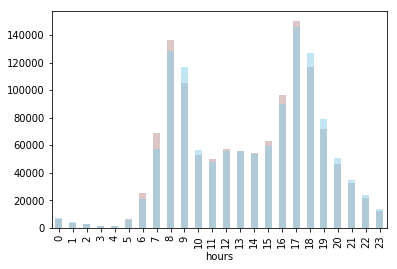

In [44]:
# Compare by hours 
df_tripinfo['start_date_time'].groupby(df_tripinfo["start_date_time"].dt.hour).count().plot(kind="bar", color = 'RosyBrown', alpha = 0.5)
df_tripinfo['end_date_time'].groupby(df_tripinfo["end_date_time"].dt.hour).count().plot(kind="bar", color = 'skyblue', alpha = 0.5)
plt.xlabel('hours');
# print(df_tripinfo['start_time'][0])

# df_tripinfo["start_time"].values

Similar to date, start time and end time show very similar plot shapes. Also, as expected, two peaks were observed: one in the morning and one in the late afternoon. 

**variable of interest: User Gender, User Type**

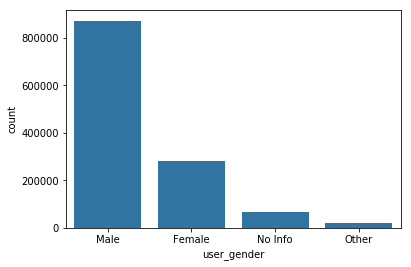

In [45]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_userinfo, x = 'user_gender', color = base_color);

Interestingly, males prefer Fordgobike than other genders 

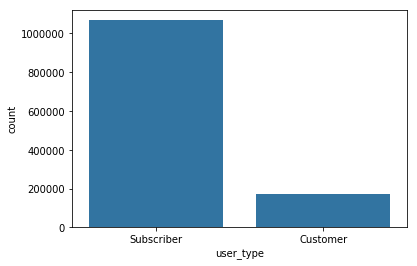

In [46]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_userinfo, x = 'user_type', color = base_color);

Here, it is clearly seen that most of FordGobike users are subscribers. 

**Variable of Interest: User Birth Year**

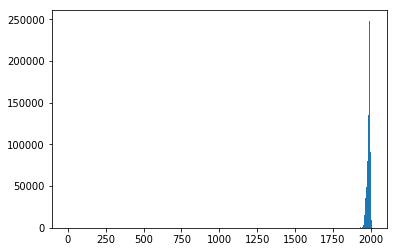

In [47]:
bin_edges = np.arange(
    df_userinfo['user_birth_year'].min()-4, 
    df_userinfo['user_birth_year'].max()+4, 
    4)
plt.hist(data = df_userinfo, x = 'user_birth_year', bins = bin_edges);

zeros are outliers. Here, zeros represent no birth year info

In [48]:
# Table only with birth year data

df_withbirthyear = df_userinfo.loc[df_userinfo['user_birth_year'] != 0]

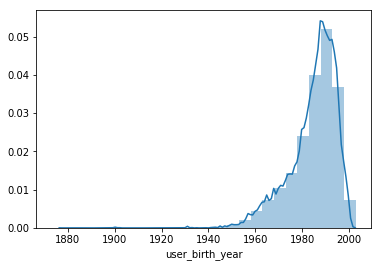

In [49]:
bin_edges = np.arange(
    df_withbirthyear['user_birth_year'].min()-5, 
    df_withbirthyear['user_birth_year'].max()+5, 
    5)
sb.distplot(df_withbirthyear['user_birth_year'], bins = bin_edges);

In [50]:
print(df_withbirthyear['user_birth_year'].min())
print(df_withbirthyear['user_birth_year'].max())

df_withbirthyear.loc[df_withbirthyear['user_birth_year'] < 1920, 'user_birth_year']

1878
2001


6785       1902
8793       1901
11554      1900
15392      1900
15865      1902
18372      1901
20672      1902
24879      1900
27515      1901
30511      1900
30591      1901
30734      1900
34830      1900
36908      1901
38176      1900
38248      1900
39156      1900
39269      1900
40064      1900
40638      1900
43374      1900
43875      1900
44042      1900
46951      1901
47172      1901
47425      1900
50058      1900
51345      1900
55159      1900
57287      1900
           ... 
1130988    1902
1132189    1900
1132871    1900
1134056    1902
1135831    1900
1136003    1900
1139031    1901
1143769    1900
1146049    1900
1146174    1900
1146635    1900
1150625    1900
1153750    1902
1168050    1902
1173264    1904
1182053    1900
1182603    1900
1183627    1902
1195903    1902
1196070    1900
1202334    1896
1203429    1902
1206202    1900
1209285    1896
1210071    1896
1211745    1902
1214654    1902
1216753    1896
1230546    1900
1234334    1900
Name: user_birth_year, L

There are 499 observations with birth year prior to 1920, which means user is more than 100 years old. The minimum birth year in the observation is 1878. It is highly unlikely that birth year is true. Also, most of users were born around 1990.

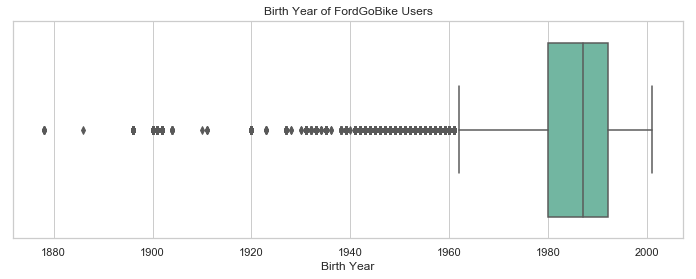

In [51]:
plt.figure(figsize=(12,4))
sb.set(style="whitegrid")
sb.boxplot(x=df_withbirthyear['user_birth_year'], palette="Set2")
plt.xlabel('Birth Year')
plt.title('Birth Year of FordGoBike Users');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- Date: April is the most popular month between January and June of 2019 
- Time: Two obvious peaks were observed. Two most popular time for Fordgobike is around 8 o'clock in the morning and 5 o'clock in the afternoon 
- Gender: Fordgobike is more popular among males
- Type: Most of Forgobike users subscribe to the service 
- Birth year: There are many outliers, which is likely not valid data. Median of Fordgobike user's birth year is around late 1980's. Most popular age group using Fordgobike is ~ 30 years old. 
- Transformation was not needed to explore these datasets

## Bivariate Exploration

Popular location was not seen in Univariate exploration.

**Variable of interest: Longtitude and Ladtitude**

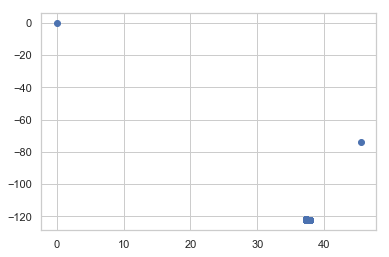

In [52]:
plt.scatter(df_tripinfo['start_station_latitude'],df_tripinfo['start_station_longitude'] )

Two outliers are observed.

In [53]:
# Remove outliers 
df_loc = df_tripinfo.loc[df_tripinfo['start_station_latitude'] > 10]
df_loc = df_loc.loc[df_loc['start_station_latitude'] < 40]

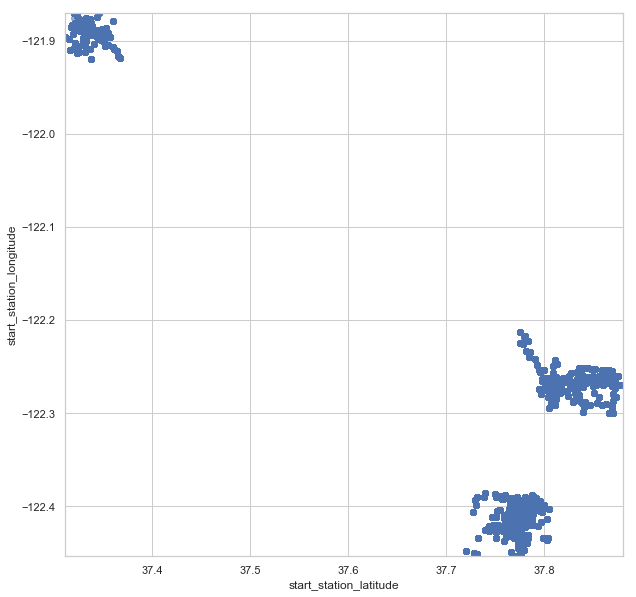

In [54]:
plt.figure(figsize = [10, 10])

sb.regplot(data = df_loc, x = 'start_station_latitude', y = 'start_station_longitude', fit_reg = False,
           x_jitter = 0.00001, y_jitter = 0.00001, scatter_kws = {'alpha' : 1/3})
plt.ylim(top=df_loc['start_station_longitude'].max(),  bottom = df_loc['start_station_longitude'].min());
plt.xlim(left=df_loc['start_station_latitude'].min(),  right = df_loc['start_station_latitude'].max());

Three clusters were observed. Using Google Maps, each clusters were identified. The bottom cluster is San Francisco area, the one above San Francisco is Berkeley area, and the top cluster is San Jose area.

However, it is hard to tell in which city uses Fordgobike is unclear.

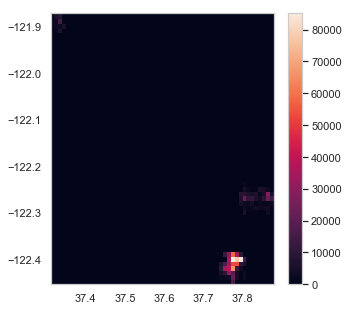

In [55]:
# Use a different type of plot (heatmap)
plt.figure(figsize = [5, 5])

bins_x = np.arange(df_loc['start_station_latitude'].min(), 
                   df_loc['start_station_latitude'].min()+
                   df_loc['start_station_longitude'].max()-
                   df_loc['start_station_longitude'].min(), 0.01)
bins_y = np.arange(df_loc['start_station_longitude'].min(), 
                   df_loc['start_station_longitude'].max(), 0.01)
plt.hist2d(data = df_loc, x = 'start_station_latitude', y = 'start_station_longitude',
           bins = [bins_x, bins_y])
plt.colorbar();
plt.ylim(top=df_loc['start_station_longitude'].max(),  bottom = df_loc['start_station_longitude'].min());
plt.xlim(left=df_loc['start_station_latitude'].min(),  right = df_loc['start_station_latitude'].max());

Here, it is much more clear that San Francisco uses Fordgobike the most. 

**Variables of interest: Duration vs other variables**

In this dataset, trip duration is the only continuous numeric observation. 

In [56]:
# Get sample data to explore efficiently 
samples = np.random.choice(df_tripinfo.shape[0], 500, replace = False)
trip_samp = df_tripinfo.iloc[samples,:]
user_samp = df_userinfo.iloc[samples,:]
trip_samp["start_date_time"] = trip_samp["start_date_time"].astype("datetime64")
trip_samp["end_date_time"] = trip_samp["end_date_time"].astype("datetime64")

C:\Users\psahn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\psahn\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(-547.15, 2500)

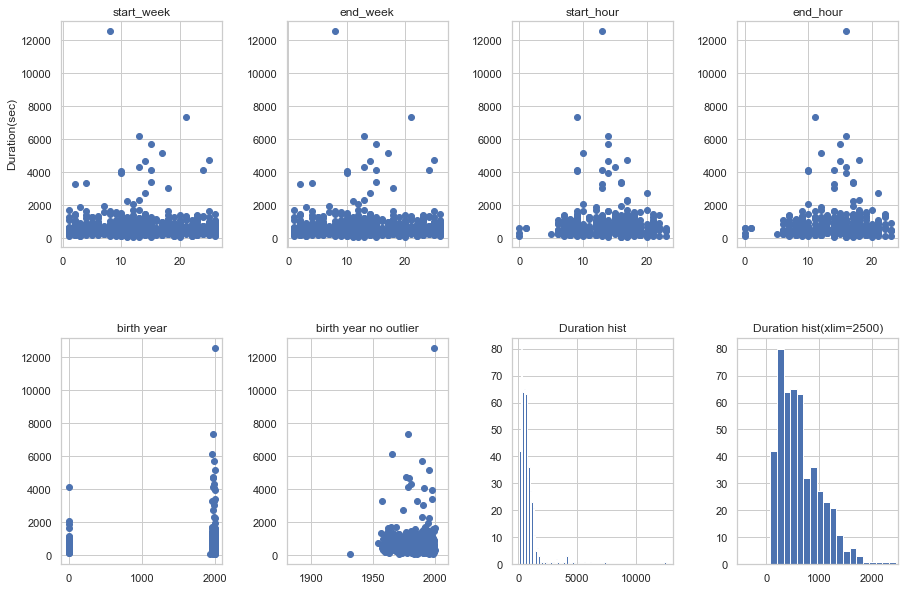

In [57]:
fig = plt.figure(figsize = [15, 10])
fig.subplots_adjust(hspace=0.4, wspace=0.4)

trip_samp
ax = fig.add_subplot(2, 4, 1)
ax.scatter(trip_samp["start_date_time"].dt.week,
          trip_samp['duration_sec'])
plt.title('start_week')
plt.ylabel('Duration(sec)')

ax = fig.add_subplot(2, 4, 2)
ax.scatter(trip_samp["end_date_time"].dt.week,
          trip_samp['duration_sec'])
plt.title('end_week')

ax = fig.add_subplot(2, 4, 3)
ax.scatter(trip_samp["start_date_time"].dt.hour,
          trip_samp['duration_sec'])
plt.title('start_hour')

ax = fig.add_subplot(2, 4, 4)
ax.scatter(trip_samp["end_date_time"].dt.hour,
          trip_samp['duration_sec'])
plt.title('end_hour')

ax = fig.add_subplot(2, 4, 5)
ax.scatter(user_samp["user_birth_year"],
          trip_samp['duration_sec'])
plt.title('birth year')

ax = fig.add_subplot(2, 4, 6)
ax.scatter(user_samp["user_birth_year"],
          trip_samp['duration_sec'])
plt.title('birth year no outlier')
plt.xlim(left = 1880, right = 2010)

ax = fig.add_subplot(2, 4, 7)
ax.hist(trip_samp['duration_sec'], bins = 100)
plt.title('Duration hist')

ax = fig.add_subplot(2, 4, 8)
ax.hist(trip_samp['duration_sec'], bins = 100)
plt.title('Duration hist(xlim=2500)')
plt.xlim(right = 2500)

There are few outliers in trip duration. One interesting observation about the outlier is that most of outlier is at birth year ~1980, which is the most popular age group with Fordgobike. Duration seems that it doesn't change much over weeks (January to June). There is hardly anyone who rides Fordgobike between 1 - 5 AM. Slight increase of duration (peaks) are shown in accordance to two peaks in the morning and in the late afternoon about number of rides per hours. It seems like most of trip duration is around 600 seconds (10 mins).  

**Variables of Interest: Birth Year and gender**

Issue:
- There are 499 observations with birth year prior to 1920, which means user is more than 100 years old. The minimum birth year in the observation is 1878. It is highly unlikely that birth year is true. 

C:\Users\psahn\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


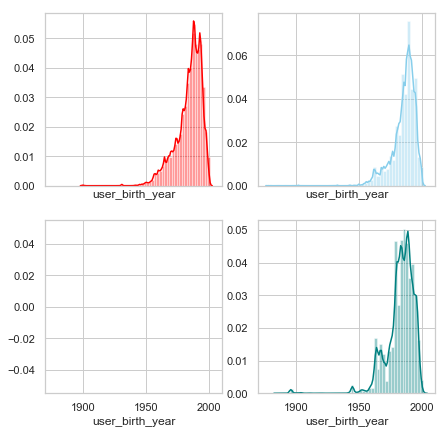

In [58]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)

sb.distplot(df_withbirthyear.loc[df_withbirthyear['user_gender'] == 'Male', 'user_birth_year'], color="red", ax=axes[0, 0])
sb.distplot(df_withbirthyear.loc[df_withbirthyear['user_gender'] == 'Female', 'user_birth_year'], color="skyblue", ax=axes[0, 1])
sb.distplot(df_withbirthyear.loc[df_withbirthyear['user_gender'] == 'No Info', 'user_birth_year'], color="red", ax=axes[1, 0])
sb.distplot(df_withbirthyear.loc[df_withbirthyear['user_gender'] == 'Other', 'user_birth_year'], color="teal", ax=axes[1, 1])

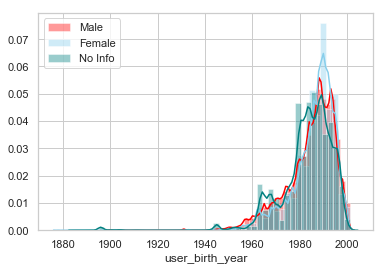

In [59]:
# Subplots above looks similar. Compare by overlapping all plots.
# All data has gender information. 'No Info' analysis is no longer needed

sb.distplot(df_withbirthyear.loc[df_withbirthyear['user_gender'] == 'Male', 'user_birth_year'], color="red")
sb.distplot(df_withbirthyear.loc[df_withbirthyear['user_gender'] == 'Female', 'user_birth_year'], color="skyblue")
sb.distplot(df_withbirthyear.loc[df_withbirthyear['user_gender'] == 'Other', 'user_birth_year'], color="teal")
plt.legend(('Male','Female', 'No Info','Other'))

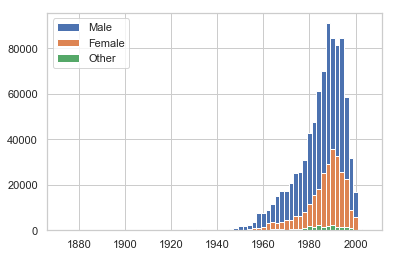

In [60]:
# Plot histogram with absolute numbers
bin_edges = np.arange(df_withbirthyear['user_birth_year'].min()-5, df_withbirthyear['user_birth_year'].max()+5, 2)
plt.hist(data = df_withbirthyear.loc[df_withbirthyear['user_gender'] == 'Male'], x = 'user_birth_year', bins = bin_edges)
plt.hist(data = df_withbirthyear.loc[df_withbirthyear['user_gender'] == 'Female'], x = 'user_birth_year', bins = bin_edges)
plt.hist(data = df_withbirthyear.loc[df_withbirthyear['user_gender'] == 'Other'], x = 'user_birth_year', bins = bin_edges);
plt.legend(('Male','Female','Other'))

Absolute number of users by gender is different but shapes of the histogram are similar which means average birth year of the user is about the same. 

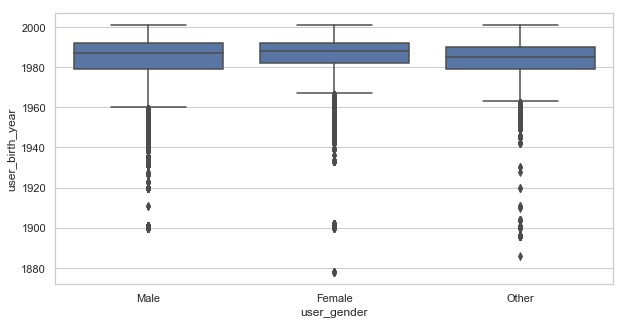

In [61]:
# similar obervation is shown in box plots 
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

sb.boxplot(data = df_withbirthyear, x = 'user_gender', y = 'user_birth_year', color = base_color);

**Variables of Interest: Duration and Gender**

In [62]:
df_dur_gen = df_tripinfo[['duration_sec']]
df_dur_gen['user_gender'] = df_userinfo[['user_gender']]

C:\Users\psahn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


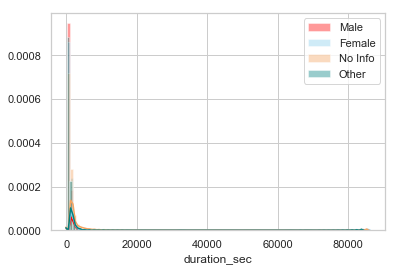

In [63]:
sb.distplot(df_dur_gen.loc[df_dur_gen['user_gender'] == 'Male', 'duration_sec'], color="red", bins = 100)
sb.distplot(df_dur_gen.loc[df_dur_gen['user_gender'] == 'Female', 'duration_sec'], color="skyblue", bins = 100)
sb.distplot(df_dur_gen.loc[df_dur_gen['user_gender'] == 'No Info', 'duration_sec'], color="SandyBrown", bins = 100)
sb.distplot(df_dur_gen.loc[df_dur_gen['user_gender'] == 'Other', 'duration_sec'], color="teal", bins = 100)
plt.legend(('Male','Female', 'No Info','Other'))

(0, 10000)

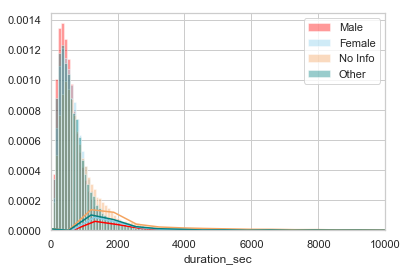

In [64]:
sb.distplot(df_dur_gen.loc[df_dur_gen['user_gender'] == 'Male', 'duration_sec'], color="red", bins = 1000)
sb.distplot(df_dur_gen.loc[df_dur_gen['user_gender'] == 'Female', 'duration_sec'], color="skyblue", bins = 1000)
sb.distplot(df_dur_gen.loc[df_dur_gen['user_gender'] == 'No Info', 'duration_sec'], color="SandyBrown", bins = 1000)
sb.distplot(df_dur_gen.loc[df_dur_gen['user_gender'] == 'Other', 'duration_sec'], color="teal", bins = 1000)
plt.legend(('Male','Female', 'No Info','Other'))
plt.xlim(left = 0, right = 10000)

Similar to birth year vs. gender, shapes of the histogram are similar which means trip duration per user is not too different by gender.

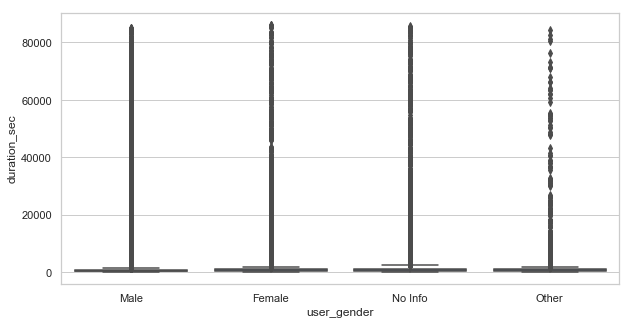

In [65]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

sb.boxplot(data = df_dur_gen, x = 'user_gender', y = 'duration_sec', color = base_color);

Box plots do not show the data in good shape because there are so many outliers. This means that most of trip duration is below 5000 seconds which was also observed in the histogram. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset? Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

This dataset is mostly contains categorical data. Trip duration was a representative neumarical data; however, it doesn't have correlation to most of other variables including my main variables of interest (date and time). Trip duration shows slightly similar behavior with number of Fordgobike users per hours and with birth year. Overall, trip information variables are mostly not related to other variables. 

### Multivariate Exploration

From above, few variables with interesting observations were determined. Start(or End) Hour, Duration (in seconds), Gender, and Birth Year. I will explore to see if there is any relationship among those for variables. 

In [66]:
trip_samp.loc[df_userinfo['user_birth_year'] != 0]

,arbitrary_trip_id,bike_id,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,start_date_time,end_date_time,bike_share_for_all_trip
964847,1964848,4008,88,276,37.332233,-121.912517,277,37.333658,-121.908586,2019-05-14 20:19:05.090,2019-05-14 20:20:33.460,Yes
642444,1642445,2104,274,35,37.329119,-121.904576,276,37.332233,-121.912517,2019-04-29 14:17:41.128,2019-04-29 14:22:15.230,No
639305,1639306,2476,362,266,37.862464,-122.264791,18,37.850222,-122.260172,2019-04-29 20:07:34.544,2019-04-29 20:13:37.490,No
940518,1940519,1166,7369,278,37.331932,-121.904888,278,37.331932,-121.904888,2019-05-20 09:43:53.246,2019-05-20 11:46:43.092,No
575906,1575907,4534,953,265,37.858868,-122.291209,148,37.829705,-122.287610,2019-03-08 16:30:02.264,2019-03-08 16:45:56.246,No
119822,1119823,4326,574,324,37.788300,-122.408531,58,37.776619,-122.417385,2019-01-14 18:11:47.303,2019-01-14 18:21:21.991,No
896832,1896833,530,784,115,37.765026,-122.398773,49,37.780760,-122.394989,2019-05-28 09:29:13.452,2019-05-28 09:42:18.191,No
66697,1066698,4962,853,74,37.776435,-122.426244,133,37.755213,-122.420975,2019-01-23 21:05:02.565,2019-01-23 21:19:15.595,No
115670,1115671,5558,734,343,37.783172,-122.393572,9,37.798572,-122.400869,2019-01-15 18:10:50.478,2019-01-15 18:23:05.018,No
909265,1909266,1802,753,247,37.867789,-122.265896,385,37.850578,-122.278175,2019-05-24 19:36:13.883,2019-05-24 19:48:47.695,No


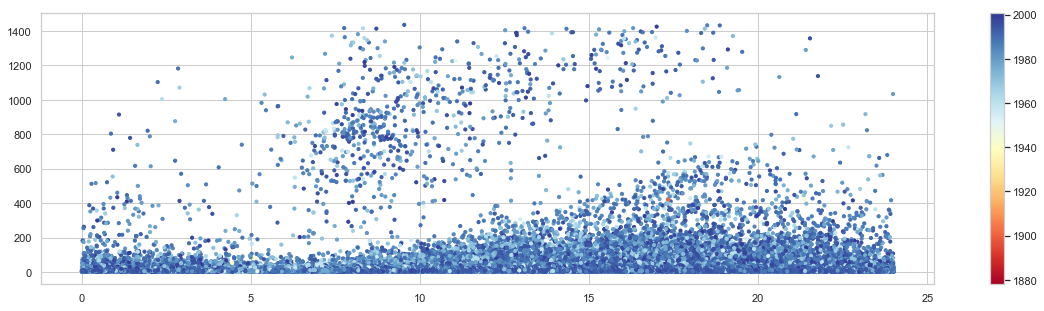

In [67]:
plt.figure(figsize = [20, 5])
cm = plt.cm.get_cmap('RdYlBu')
x = (df_tripinfo.loc[df_userinfo['user_birth_year'] != 0, "end_date_time"].dt.hour 
     + df_tripinfo.loc[df_userinfo['user_birth_year'] != 0, "end_date_time"].dt.minute /60 
     + df_tripinfo.loc[df_userinfo['user_birth_year'] != 0, "end_date_time"].dt.second /60/60)
y = df_tripinfo.loc[df_userinfo['user_birth_year'] != 0, "duration_sec"] /60
z = df_userinfo.loc[df_userinfo['user_birth_year'] != 0, 'user_birth_year']
sc = plt.scatter(x, y, c=z, cmap=cm, s=10)
plt.colorbar(sc)
plt.show()


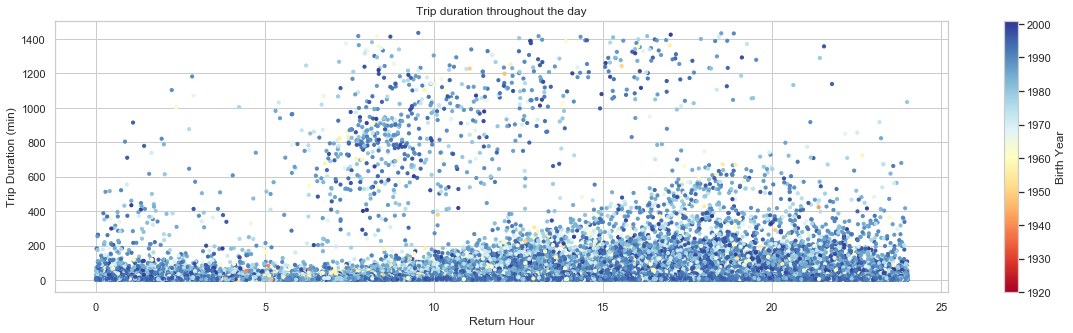

In [68]:
# To only include valid data as much as possible, remove if the user's birth year is prior to year 1920

plt.figure(figsize = [20, 5])
cm = plt.cm.get_cmap('RdYlBu')
x = (df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "end_date_time"].dt.hour 
     + df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "end_date_time"].dt.minute /60 
     + df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "end_date_time"].dt.second /60/60)
y = df_tripinfo.loc[df_userinfo['user_birth_year'] > 1919, "duration_sec"] /60
z = df_userinfo.loc[df_userinfo['user_birth_year'] > 1919, 'user_birth_year']
sc = plt.scatter(x, y, c=z, cmap=cm, s=10)
cbar = plt.colorbar(sc)
plt.ylabel('Trip Duration (min)')
plt.xlabel('Return Hour')
cbar.set_label('Birth Year', rotation=90)
plt.title('Trip duration throughout the day')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest? Were there any interesting or surprising interactions between features?

One point that really stands out in this part of the investigation was the trip duration cluster during the daytime (8 AM - 8 PM). While majority of people uses bike less then 100 minutes, There are people who uses bikes for nearly (sometimes over) a full day (24 hours). Note that x-axis shows the time of the return of the bike. It is possible to guess that many long-term riders uses bikes overnight and return them in the morning. 

Besides the floating cluster in the plot, it is possible to observe that trip duration is increasing as the time goes from morning to evening. That shows many riders checkout the bike in the morning and keep them until the evening. 

Also, one interesting fact that is obeserved from the plot is that the number of darker blue markers (meaning younger riders) are less in early morning. Compare to the afternoon, it is harder to see darker blue marker between 4-8AM. Instead, more green and yellow markers are showing, meaning older riders briefly rides (note that trip duration is very short compare to other times of the day) in the early morning. 